--- Análisis de Datos del Centro Médico Bienestar 2025 ---


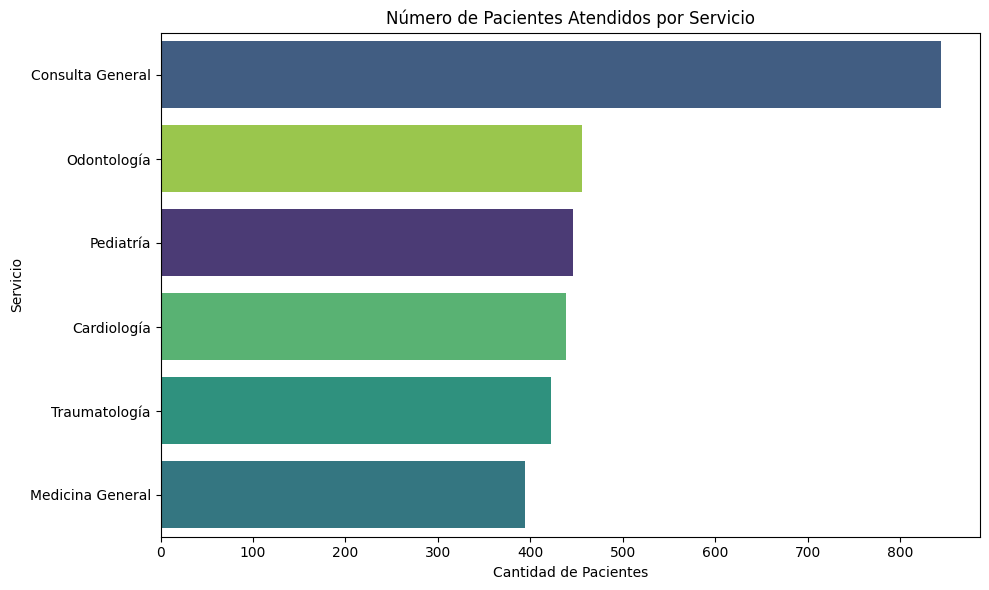

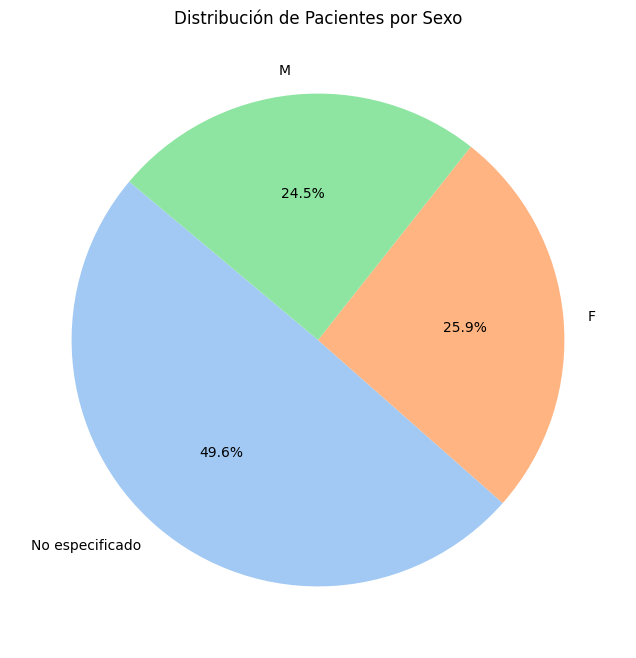

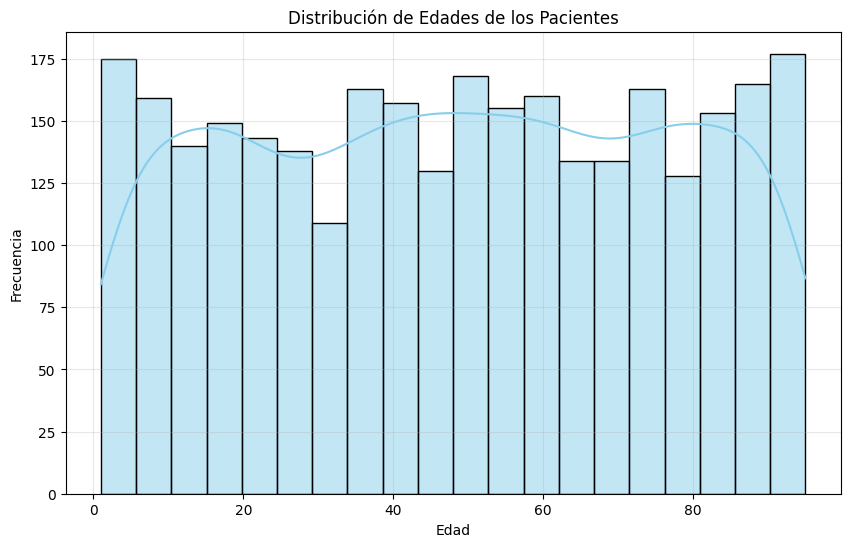


--- Promedio de Montos por Distrito ---
     distrito       monto
0       Lince  290.662483
1  San Isidro  286.620069
2       Surco  276.338266
3   La Molina  273.382930
4  Miraflores  272.973272
5       Comas  272.358605
6         SJL  264.702381


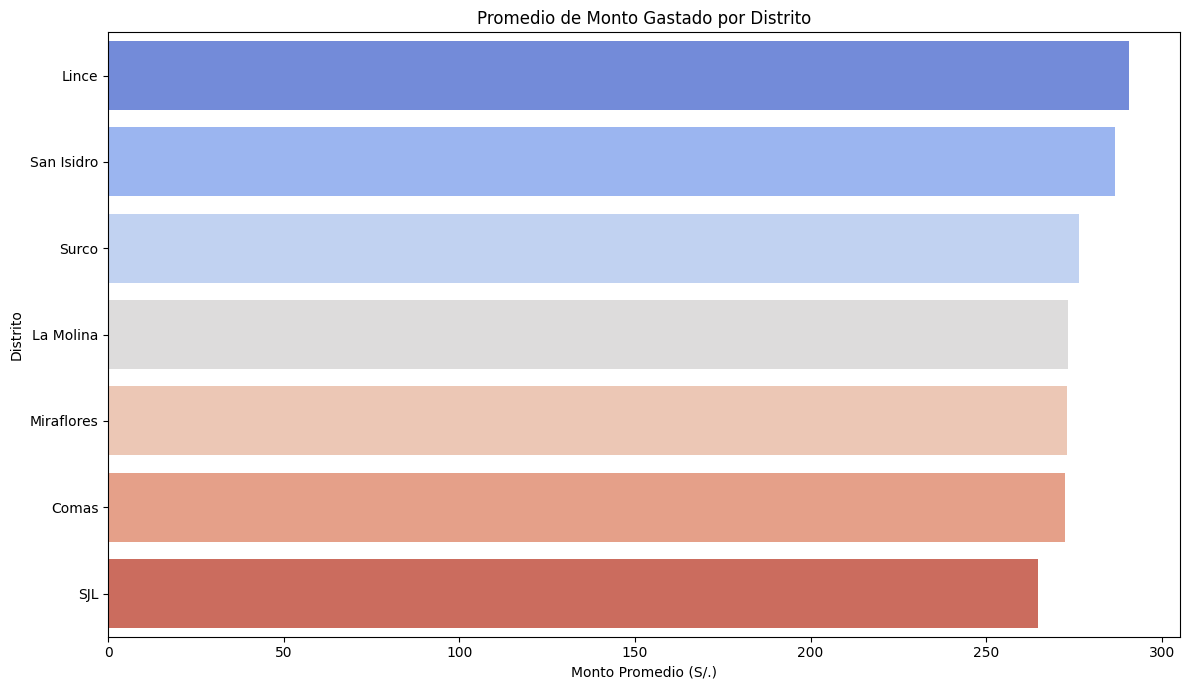

C:\Users\YENNY\AppData\Local\Temp\ipykernel_25940\3655186590.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='monto', y='servicio', palette='plasma', order=df.groupby('servicio')['monto'].median().sort_values(ascending=False).index)


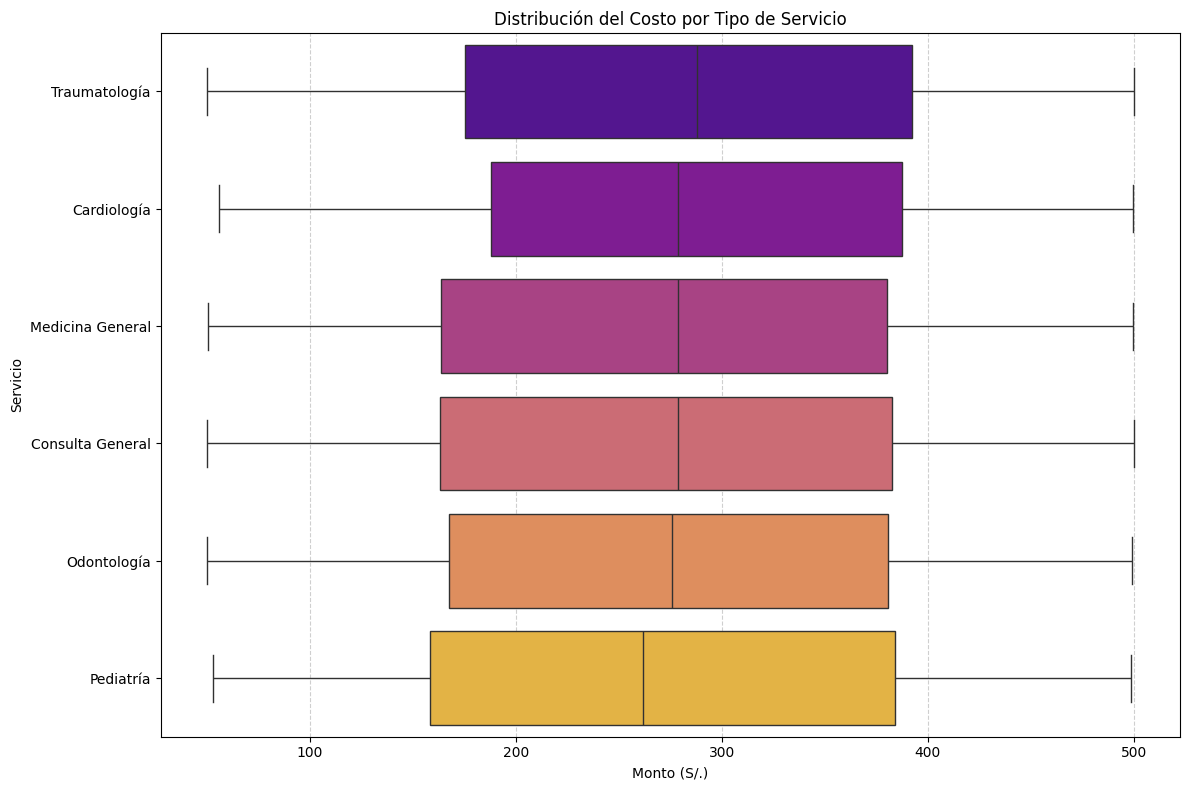

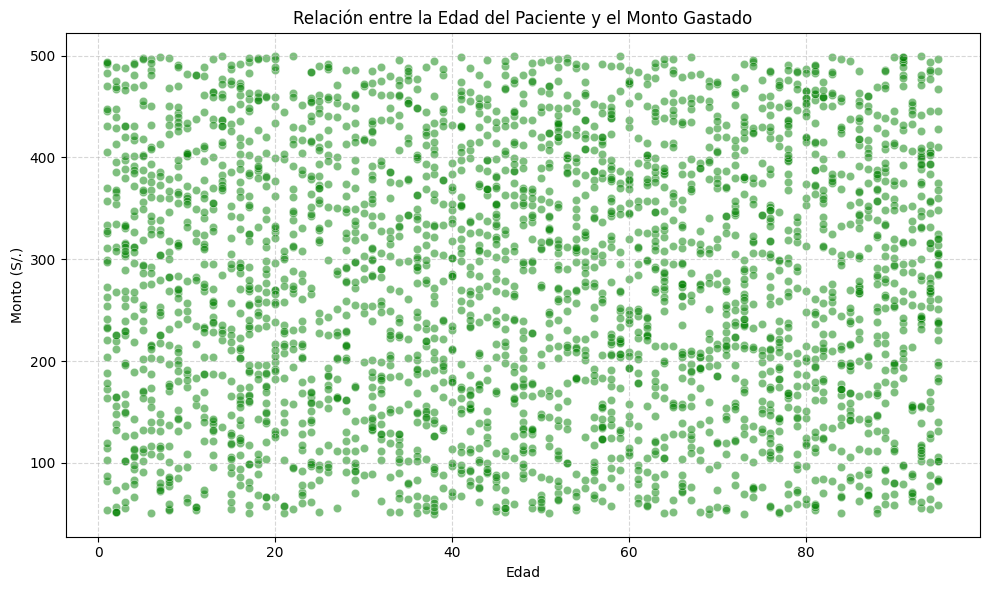

C:\Users\YENNY\AppData\Local\Temp\ipykernel_25940\3655186590.py:93: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  atenciones_por_mes = df.set_index('fecha_atencion').resample('M').size()


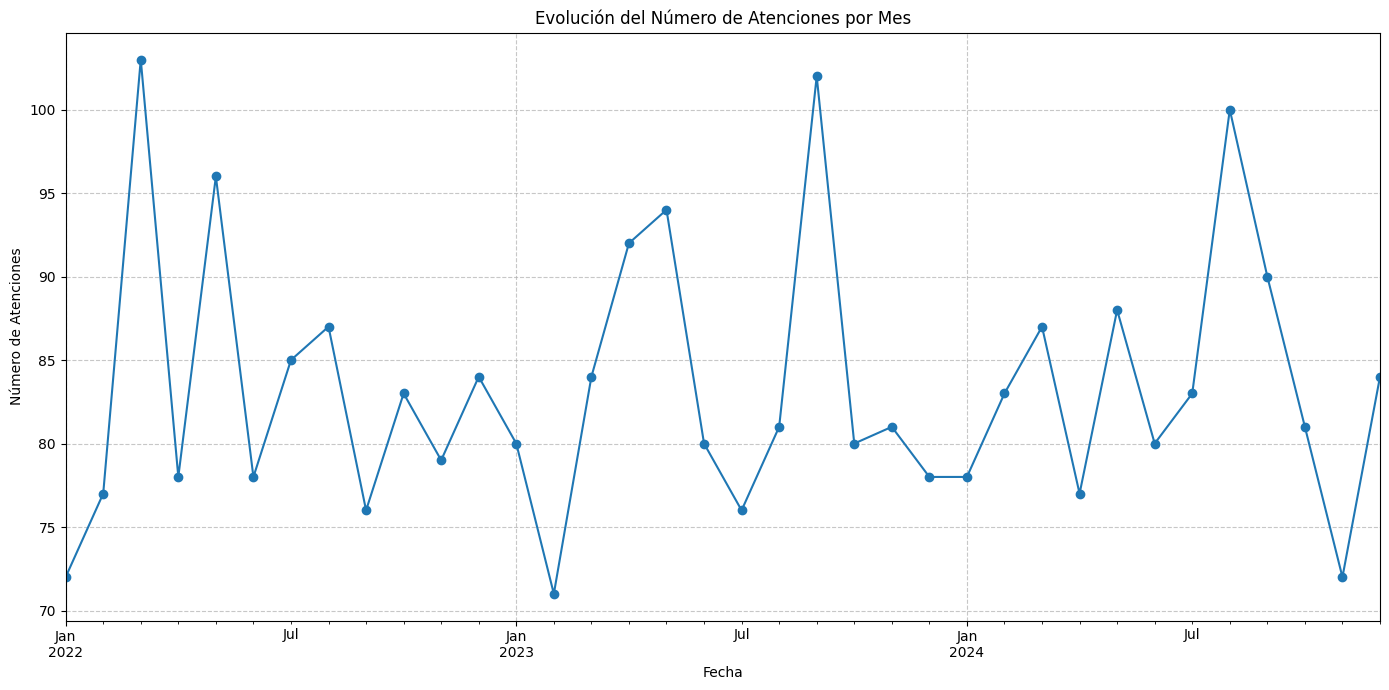


¡Análisis completado y todos los gráficos han sido guardados en la carpeta 'reports'!


In [3]:
# scripts/6_Reportes.ipynb

import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Conectar a MongoDB y cargar datos
client = MongoClient("mongodb://localhost:27017/")
db = client["SaludDigital_2025"]
collection = db["pacientes"]
data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)

# Asegurarse de que la columna de fecha sea del tipo datetime para análisis temporal
df['fecha_atencion'] = pd.to_datetime(df['fecha_atencion'])

client.close()

# Ruta para guardar los reportes
reports_path = Path.cwd().parent / "reports"
reports_path.mkdir(exist_ok=True) # Crea la carpeta si no existe

print("--- Análisis de Datos del Centro Médico Bienestar 2025 ---")

# --- 1. Gráfico de barras: Pacientes por servicio ---
plt.figure(figsize=(10, 6))
sns.countplot(y='servicio', data=df, order=df['servicio'].value_counts().index, palette='viridis', hue='servicio', dodge=False)
plt.title('Número de Pacientes Atendidos por Servicio')
plt.xlabel('Cantidad de Pacientes')
plt.ylabel('Servicio')
plt.tight_layout()
plt.savefig(reports_path / "pacientes_atendidos_por_servicio.png")
plt.show()

# --- 2. Gráfico circular: Distribución por sexo ---
sexo_counts = df['sexo'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribución de Pacientes por Sexo')
plt.ylabel('')
plt.savefig(reports_path / "distribucion_por_sexo.png")
plt.show()

# --- 3. Histograma: Distribución de edades ---
plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.savefig(reports_path / "distribucion_de_edades.png")
plt.show()

# --- 4. Reporte tabular y Gráfico: Promedio de montos por distrito ---
promedio_distrito = df.groupby('distrito')['monto'].mean().sort_values(ascending=False).reset_index()
print("\n--- Promedio de Montos por Distrito ---")
print(promedio_distrito)

plt.figure(figsize=(12, 7))
sns.barplot(data=promedio_distrito, x='monto', y='distrito', palette='coolwarm', hue='distrito', dodge=False)
plt.title('Promedio de Monto Gastado por Distrito')
plt.xlabel('Monto Promedio (S/.)')
plt.ylabel('Distrito')
plt.tight_layout()
plt.savefig(reports_path / "promedio_de_montos_por_distrito.png")
plt.show()

# --- 5. Nuevo Gráfico: Análisis de Costo por Tipo de Servicio (Boxplot) ---
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='monto', y='servicio', palette='plasma', order=df.groupby('servicio')['monto'].median().sort_values(ascending=False).index)
plt.title('Distribución del Costo por Tipo de Servicio')
plt.xlabel('Monto (S/.)')
plt.ylabel('Servicio')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(reports_path / "costo_por_servicio.png")
plt.show()

# --- 6. Nuevo Gráfico: Relación entre Edad y Monto Gastado (Scatterplot) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='edad', y='monto', alpha=0.5, color='green')
plt.title('Relación entre la Edad del Paciente y el Monto Gastado')
plt.xlabel('Edad')
plt.ylabel('Monto (S/.)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(reports_path / "edad_vs_monto.png")
plt.show()

# --- 7. Nuevo Gráfico: Número de Atenciones a lo Largo del Tiempo (Line Plot) ---
atenciones_por_mes = df.set_index('fecha_atencion').resample('M').size()
plt.figure(figsize=(14, 7))
atenciones_por_mes.plot(kind='line', marker='o', linestyle='-')
plt.title('Evolución del Número de Atenciones por Mes')
plt.xlabel('Fecha')
plt.ylabel('Número de Atenciones')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(reports_path / "atenciones_por_mes.png")
plt.show()

print("\n¡Análisis completado y todos los gráficos han sido guardados en la carpeta 'reports'!")

# 📈 Análisis de Visualizaciones de Datos



### **1. Gráfico de Barras: Número de Pacientes Atendidos por Servicio**

* **¿Qué nos dice el gráfico?**
    Esta visualización es clave para entender la operatividad del centro, ya que muestra de forma directa cuáles son los servicios con mayor demanda (barras más largas) y cuáles son los menos frecuentados.

* **Análisis de Negocio**
    Permite tomar decisiones estratégicas fundamentales. Si "Medicina General" y "Odontología" son los servicios más solicitados, la administración podría:
    -   **Asignar más recursos**: Contratar más especialistas en esas áreas.
    -   **Optimizar espacios**: Ampliar el número de consultorios dedicados.
    -   **Impulsar otros servicios**: Crear campañas de marketing para los servicios con menor demanda.

---

### **2. Gráfico Circular: Distribución de Pacientes por Sexo**

* **¿Qué nos dice el gráfico?**
    Ofrece una radiografía demográfica instantánea, mostrando la proporción de pacientes masculinos, femeninos y aquellos cuyo sexo no fue especificado.

* **Análisis de Negocio**
    Esta información es valiosa para la personalización de los servicios. Por ejemplo:
    -   **Campañas de salud dirigidas**: Si hay una mayoría de pacientes femeninas, se pueden lanzar campañas de prevención de cáncer de mama.
    -   **Inclusividad**: Ayuda a asegurar que los servicios y la comunicación sean adecuados para la demografía de género del centro.

---

### **3. Histograma: Distribución de Edades de los Pacientes**

* **¿Qué nos dice el gráfico?**
    El histograma revela qué grupos de edad son los más comunes en el centro médico. Se puede identificar fácilmente si la mayoría de los pacientes son niños, adultos jóvenes o personas de la tercera edad.

* **Análisis de Negocio**
    Es crucial para la planificación de la oferta de servicios:
    -   **Demanda de especialidades**: Un pico en edades tempranas indica una alta demanda de **Pediatría**. Un aumento en edades avanzadas sugiere la necesidad de fortalecer **Cardiología** o **Traumatología**.
    -   **Comunicación adaptada**: Permite que las campañas de marketing y la atención al cliente se ajusten al grupo etario predominante.

---

### **4. Gráfico de Barras: Promedio de Monto Gastado por Distrito**

* **¿Qué nos dice el gráfico?**
    Compara el gasto promedio de los pacientes según su distrito de residencia. Esto puede indicar las zonas geográficas con mayor poder adquisitivo o donde se contratan los servicios más costosos.

* **Análisis de Negocio**
    Esta información es oro puro para el departamento de marketing y expansión:
    -   **Marketing geolocalizado**: Se pueden lanzar campañas publicitarias y promociones específicas en los distritos con mayor gasto.
    -   **Decisiones de expansión**: Si se planea abrir una nueva sucursal, un distrito con un alto gasto promedio y una base de pacientes sólida es un candidato ideal.

---

### **5. Boxplot: Análisis de Costo por Tipo de Servicio**

* **¿Qué nos dice el gráfico?**
    A diferencia de un promedio simple, el boxplot muestra la distribución completa de los costos para cada servicio: el precio mínimo, el máximo, la mediana (el costo central) y si existen valores atípicos (consultas inusualmente caras).

* **Análisis de Negocio**
    Permite un análisis financiero más sofisticado:
    -   **Identificar rentabilidad**: Se puede descubrir que "Cardiología", aunque no sea el servicio más popular, es el que genera mayores ingresos por consulta.
    -   **Estandarizar precios**: Si un servicio muestra una variabilidad de precios muy grande (una "caja" muy larga), podría ser necesario revisar y estandarizar las tarifas.

---

### **6. Gráfico de Dispersión: Relación entre Edad y Monto Gastado**

* **¿Qué nos dice el gráfico?**
    Este gráfico ayuda a responder la pregunta: ¿existe una relación entre la edad de un paciente y el monto que gasta? Cada punto representa a un paciente, permitiendo visualizar tendencias.

* **Análisis de Negocio**
    Descubrir una correlación aquí puede ser muy revelador:
    -   **Patrones de gasto**: Si se observa que a mayor edad, mayor es el monto gastado, podría deberse a que los tratamientos para condiciones crónicas son más costosos.
    -   **Diseño de productos**: Esta información es valiosa para diseñar planes de salud preventivos para jóvenes o paquetes de tratamiento para pacientes mayores.

---

### **7. Gráfico de Líneas: Número de Atenciones a lo Largo del Tiempo**

* **¿Qué nos dice el gráfico?**
    Analizando la `fecha_atencion`, este gráfico muestra el flujo de pacientes a lo largo de los meses, permitiendo identificar patrones estacionales, como temporadas altas o bajas.

* **Análisis de Negocio**
    Es una herramienta esencial para la gestión de operaciones:
    -   **Planificación de personal**: Se puede anticipar la necesidad de contratar personal temporal durante los picos de demanda (ej. más pediatras en invierno).
    -   **Gestión de inventario**: Ayuda a asegurar que haya suficientes suministros y medicamentos durante las temporadas de alta demanda.
    -   **Marketing proactivo**: Se pueden lanzar promociones o campañas de chequeos preventivos durante los meses de menor actividad para estabilizar los ingresos.